In [1]:
from scipy.optimize import curve_fit
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

## This DataFrame shows us salaries for the last 4 years in Data jobs around the world

### _from here we will elaborate this data set to capture and predict the following data:_

*   _Average and salary comparison of DE, FR, ES_
*   _Data Scientist payment forecast in Germany until 2026 with linear regression_
*   _Data Scientist payment forecast in Spain until 2026 with linear regression_
*   _graphs to visualize correlations between wages, remote work, years, etc_
*   _Salary differences between different jobs(MI) in Germany in 2022_
*   _differences between wages and level of experience Germany 2022_
*   _Propensity for larger wages on small, medium and large companies_

In [2]:
df = pd.read_csv("ds_salaries.csv")
df['work_year'] = pd.to_datetime(df['work_year'], format='%Y')
df['work_year'] = df['work_year'].apply(lambda x: x.year)
df = df.set_index('work_year')
df


,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
work_year,,,,,,,,,,
2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...
2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S


In [3]:
media = df.groupby(['work_year','job_title','salary_currency','experience_level','employee_residence'])['salary'].mean()
media = media.to_frame()
media = media.reset_index()
media = media.set_index('work_year')
media

,job_title,salary_currency,experience_level,employee_residence,salary
work_year,,,,,
2020,AI Scientist,DKK,EN,DK,300000.0000
2020,BI Data Analyst,USD,MI,US,98000.0000
2020,Big Data Engineer,EUR,SE,PL,100000.0000
2020,Big Data Engineer,GBP,SE,GB,85000.0000
2020,Big Data Engineer,USD,EN,US,70000.0000
...,...,...,...,...,...
2023,Research Scientist,USD,SE,CA,197000.0000
2023,Research Scientist,USD,SE,ES,211475.0000
2023,Research Scientist,USD,SE,US,183729.0625


In [4]:
anno_media2020 = media.loc[media.index == 2020]
anno_media2020MI =anno_media2020.loc[anno_media2020['experience_level'] == 'MI']
anno_media2020MIEUR = anno_media2020MI.loc[anno_media2020MI['salary_currency'] == 'EUR']
anno_media2020MIEURDS = anno_media2020MIEUR.loc[anno_media2020MIEUR['job_title'] == 'Data Scientist']
anno_media2020MIEURDS

,job_title,salary_currency,experience_level,employee_residence,salary
work_year,,,,,
2020,Data Scientist,EUR,MI,DE,70000.0
2020,Data Scientist,EUR,MI,ES,34000.0
2020,Data Scientist,EUR,MI,FR,46000.0


In [5]:

anno_mediaMI =media.loc[media['experience_level'] == 'MI']
anno_mediaMIEUR = anno_mediaMI.loc[anno_mediaMI['salary_currency'] == 'EUR']
anno_mediaMIEURDS = anno_mediaMIEUR.loc[anno_mediaMIEUR['job_title'] == 'Data Scientist']
anno_mediaMIEURDS

,job_title,salary_currency,experience_level,employee_residence,salary
work_year,,,,,
2020,Data Scientist,EUR,MI,DE,70000.0
2020,Data Scientist,EUR,MI,ES,34000.0
2020,Data Scientist,EUR,MI,FR,46000.0
2021,Data Scientist,EUR,MI,DE,70130.0
2021,Data Scientist,EUR,MI,ES,35800.0
2021,Data Scientist,EUR,MI,RS,21600.0
2022,Data Scientist,EUR,MI,DE,63800.0
2022,Data Scientist,EUR,MI,FR,62500.0
2022,Data Scientist,EUR,MI,NL,79250.0


In [6]:
media11 = anno_mediaMIEURDS.groupby(['work_year','job_title','salary_currency','experience_level','employee_residence'])['salary'].mean()
media11 = media11.to_frame()
media11= media11.reset_index()
mediaDE = media11[media11['employee_residence'] == "DE"]
mediaFR = media11[media11['employee_residence'] == "FR"]
mediaES = media11[media11['employee_residence'] == "ES"]
mediaDE = mediaDE.set_index('work_year')
mediaFR = mediaFR.set_index('work_year')
mediaES = mediaES.set_index('work_year')
MediaNaz = pd.concat([mediaDE, mediaFR, mediaES])

MediaNaz = MediaNaz.reset_index()

In [7]:
DEmedia2023= np.array([2023,'Data Scientist','EUR','MI','DE',65000.0])
DEmedia2023= pd.Series(DEmedia2023, index=MediaNaz.columns)
MediaNaz = MediaNaz.append(DEmedia2023, ignore_index=True)
MediaNaz
# the added annual estimate for the year 2023 was taken to google


C:\Users\Claud\AppData\Local\Temp\ipykernel_21796\4213943864.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MediaNaz = MediaNaz.append(DEmedia2023, ignore_index=True)


,work_year,job_title,salary_currency,experience_level,employee_residence,salary
0,2020,Data Scientist,EUR,MI,DE,70000.0
1,2021,Data Scientist,EUR,MI,DE,70130.0
2,2022,Data Scientist,EUR,MI,DE,63800.0
3,2020,Data Scientist,EUR,MI,FR,46000.0
4,2022,Data Scientist,EUR,MI,FR,62500.0
5,2023,Data Scientist,EUR,MI,FR,60000.0
6,2020,Data Scientist,EUR,MI,ES,34000.0
7,2021,Data Scientist,EUR,MI,ES,35800.0
8,2023,Data Scientist,EUR,MI,ES,50000.0
9,2023,Data Scientist,EUR,MI,DE,65000.0


In [8]:
DEmedia2023= np.array([2021,'Data Scientist','EUR','MI','FR','NaN'])
DEmedia2023= pd.Series(DEmedia2023, index=MediaNaz.columns)
MediaNaz = MediaNaz.append(DEmedia2023, ignore_index=True)
DEmedia2023= np.array([2022,'Data Scientist','EUR','MI','ES','NaN'])
DEmedia2023= pd.Series(DEmedia2023, index=MediaNaz.columns)
MediaNaz = MediaNaz.append(DEmedia2023, ignore_index=True)
MediaNaz


C:\Users\Claud\AppData\Local\Temp\ipykernel_21796\4041466916.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MediaNaz = MediaNaz.append(DEmedia2023, ignore_index=True)
C:\Users\Claud\AppData\Local\Temp\ipykernel_21796\4041466916.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MediaNaz = MediaNaz.append(DEmedia2023, ignore_index=True)


,work_year,job_title,salary_currency,experience_level,employee_residence,salary
0,2020,Data Scientist,EUR,MI,DE,70000.0
1,2021,Data Scientist,EUR,MI,DE,70130.0
2,2022,Data Scientist,EUR,MI,DE,63800.0
3,2020,Data Scientist,EUR,MI,FR,46000.0
4,2022,Data Scientist,EUR,MI,FR,62500.0
5,2023,Data Scientist,EUR,MI,FR,60000.0
6,2020,Data Scientist,EUR,MI,ES,34000.0
7,2021,Data Scientist,EUR,MI,ES,35800.0
8,2023,Data Scientist,EUR,MI,ES,50000.0
9,2023,Data Scientist,EUR,MI,DE,65000.0


In [9]:
MediaNaz = MediaNaz.sort_values(by='employee_residence')
MediaNaz['salary'] = MediaNaz['salary'].astype(float)
MediaNaz = MediaNaz.fillna(MediaNaz.interpolate())
MediaNazionale = MediaNaz.mean()
MediaNazionale = round(MediaNazionale)
print('-'*50)
print('the national average between Germany, France and Spain is')
print('EUR',MediaNazionale)
print('-'*50)

--------------------------------------------------
the national average between Germany, France and Spain is
EUR salary    55436.0
dtype: float64
--------------------------------------------------


C:\Users\Claud\AppData\Local\Temp\ipykernel_21796\3790520134.py:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  MediaNazionale = MediaNaz.mean()


## _**Average and salary comparison of DE, FR, ES**_

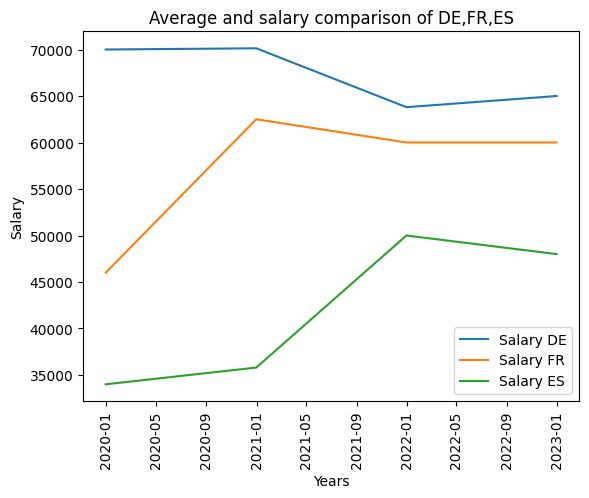

In [10]:
MediaNazDE= MediaNaz.groupby('employee_residence').get_group('DE')
MediaNazFR= MediaNaz.groupby('employee_residence').get_group('FR')
MediaNazES= MediaNaz.groupby('employee_residence').get_group('ES')
MediaNazDE = MediaNazDE.reset_index()
MediaNazD = pd.date_range(start='2019-01-01',end='2023-01-01', freq='Y')
MediaNazDE['work_year'] = MediaNazD

x = MediaNazD
y1 = MediaNazDE[MediaNazDE['employee_residence'] == "DE"]['salary']
y2 = MediaNazFR[MediaNazFR['employee_residence'] == "FR"]['salary']
y3 = MediaNazES[MediaNazES['employee_residence'] == "ES"]['salary']

plt.xticks(rotation=90)

plt.plot(x, y1, label='Salary DE')
plt.plot(x, y2, label='Salary FR')
plt.plot(x, y3, label='Salary ES')

plt.xlabel('Years')
plt.ylabel('Salary')
plt.title('Average and salary comparison of DE,FR,ES')
plt.legend()


plt.show()

## _**Data Scientist payment forecast in Germany until 2026**_

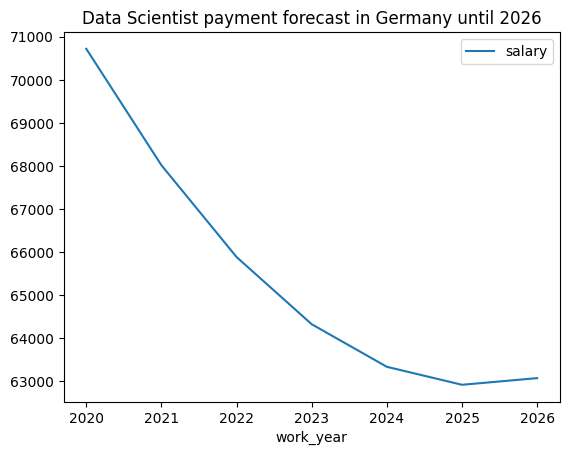

In [11]:
MediaNazDE.loc[:, 'work_year'] = [2020, 2021, 2022, 2023]

def objective_function(x, a, b, c):
    return a * x**2 + b * x + c

[a, b, c], _ = curve_fit(objective_function, MediaNazDE['work_year'],  MediaNazDE['salary'],)


predictions = pd.DataFrame(columns=['work_year', 'salary'])
for dt in range(2020, 2027):

    predictions = pd.concat([
        predictions,
        pd.DataFrame({
            'work_year': dt,
            'salary': objective_function(dt, a, b, c)
        }, index=[dt])
    ], ignore_index=True)


predictions.plot(x='work_year', y='salary')
plt.title('Data Scientist payment forecast in Germany until 2026')
plt.show()




## _**Data Scientist payment forecast in Spain until 2026**_

C:\Users\Claud\AppData\Local\Temp\ipykernel_21796\3275766058.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MediaNazES.loc[:, 'work_year'] = [2020, 2021, 2022, 2023]
C:\Users\Claud\AppData\Local\Temp\ipykernel_21796\3275766058.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  MediaNazES.loc[:, 'work_year'] = [2020, 2021, 2022, 2023]


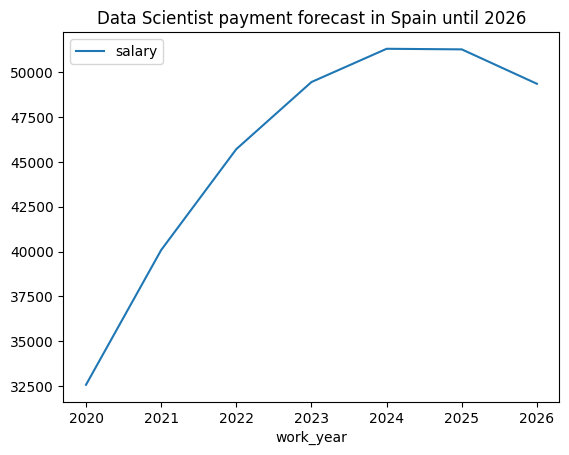

In [12]:
MediaNazES.loc[:, 'work_year'] = [2020, 2021, 2022, 2023]
MediaNazES = MediaNazES.set_index(['work_year'])
[a, b, c], _ = curve_fit(objective_function, MediaNazES.index, MediaNazES['salary'],)

def objective_function(x, a, b, c):
    return a * x**2 + b * x + c


predictions = pd.DataFrame(columns=['work_year', 'salary'])
for dt in range(2020, 2027):

    predictions = pd.concat([
        predictions,
        pd.DataFrame({
            'work_year': dt,
            'salary': objective_function(dt, a, b, c)
        }, index=[dt])
    ], ignore_index=True)

predictions.plot(x='work_year', y='salary')
plt.title('Data Scientist payment forecast in Spain until 2026')
plt.show()

In [13]:
MediaNazFR

,work_year,job_title,salary_currency,experience_level,employee_residence,salary
3,2020,Data Scientist,EUR,MI,FR,46000.0
4,2022,Data Scientist,EUR,MI,FR,62500.0
5,2023,Data Scientist,EUR,MI,FR,60000.0
10,2021,Data Scientist,EUR,MI,FR,60000.0


## _**Graphs to visualize correlations between wages, remote work, years, etc**_

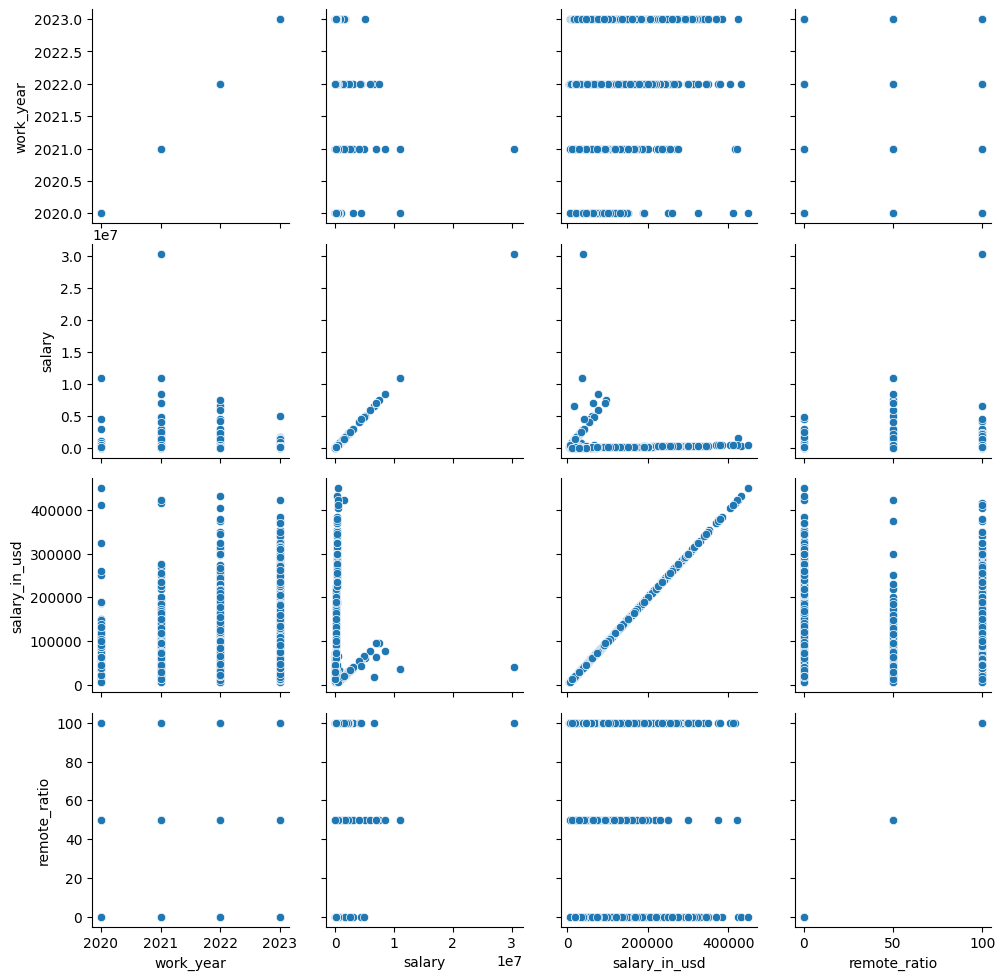

In [14]:
df = df.reset_index()
g = sns.PairGrid(df)
g.map(sns.scatterplot)

In [15]:
df.corr()

C:\Users\Claud\AppData\Local\Temp\ipykernel_21796\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,work_year,salary,salary_in_usd,remote_ratio
work_year,1.000000,-0.094724,0.228290,-0.236430
salary,-0.094724,1.000000,-0.023676,0.028731
salary_in_usd,0.228290,-0.023676,1.000000,-0.064171
remote_ratio,-0.236430,0.028731,-0.064171,1.000000


C:\Users\Claud\AppData\Local\Temp\ipykernel_21796\905235749.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), ax=ax, annot=True, fmt=".2f", cmap=sns.color_palette("magma"))


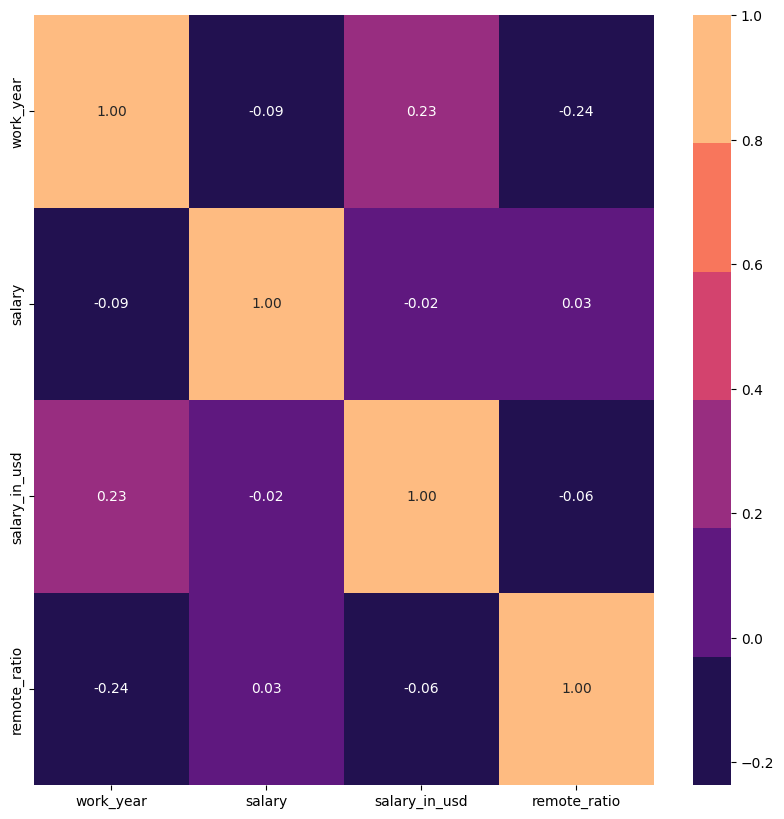

In [16]:
f, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(df.corr(), ax=ax, annot=True, fmt=".2f", cmap=sns.color_palette("magma"))

plt.show()

## _**Salary differences between different jobs(MI) in Germany in 2022**_

In [17]:
anni_mediaEURO= media.groupby('salary_currency').get_group('EUR')
anni_mediaEURO= anni_mediaEURO.groupby('experience_level').get_group('MI')
anni_mediaEURO= anni_mediaEURO.groupby('employee_residence').get_group('DE')
anni_mediaEURO= anni_mediaEURO.groupby('work_year').get_group(2022)
salario_germania2022= anni_mediaEURO

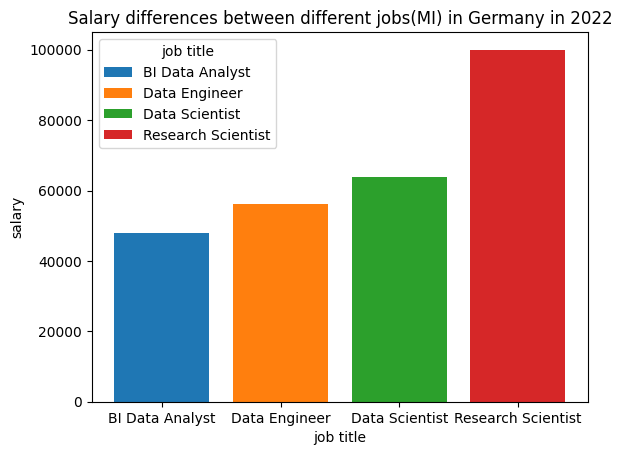

In [18]:
x = ['BI Data Analyst', 'Data Engineer', 'Data Scientist', 'Research Scientist']
y_BI_Data_Analyst, y_Data_Engineer, y_Data_Scientist, y_Research_Scientist = salario_germania2022['salary'].values

rect_1 = plt.bar(x[0], y_BI_Data_Analyst, label="BI Data Analyst")
rect_2 = plt.bar(x[1], y_Data_Engineer, label="Data Engineer")
rect_3 = plt.bar(x[2], y_Data_Scientist, label="Data Scientist")
rect_4 = plt.bar(x[3], y_Research_Scientist, label="Data Scientist")

plt.title('Salary differences between different jobs(MI) in Germany in 2022')
plt.xlabel('job title')
plt.ylabel('salary')
gender = ['BI Data Analyst', 'Data Engineer', 'Data Scientist', 'Research Scientist']
plt.legend(gender, title="job title")
plt.show()

## _**Differences between wages and level of experience Germany 2022**_

In [19]:
anni_mediaEURO= media.groupby('salary_currency').get_group('EUR')
anni_mediaEURO= anni_mediaEURO.groupby('employee_residence').get_group('DE')
anni_mediaEURO= anni_mediaEURO.groupby('work_year').get_group(2022)
salario_germania2022= anni_mediaEURO
salario_germania2022

,job_title,salary_currency,experience_level,employee_residence,salary
work_year,,,,,
2022,BI Data Analyst,EUR,EN,DE,58000.0
2022,BI Data Analyst,EUR,MI,DE,48000.0
2022,Data Engineer,EUR,MI,DE,56250.0
2022,Data Scientist,EUR,MI,DE,63800.0
2022,Lead Machine Learning Engineer,EUR,SE,DE,80000.0
2022,Machine Learning Research Engineer,EUR,EN,DE,63000.0
2022,Principal Data Scientist,EUR,SE,DE,148000.0
2022,Research Scientist,EUR,MI,DE,100000.0


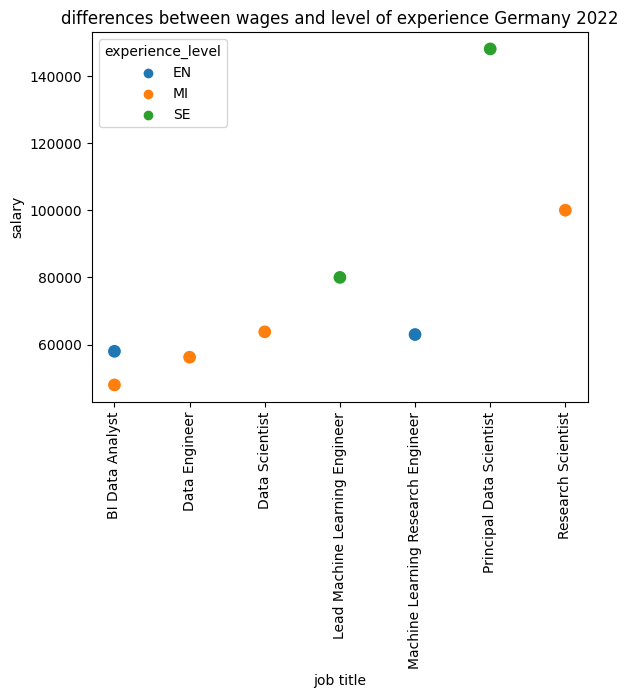

In [20]:
ax = sns.scatterplot(x=salario_germania2022['job_title'], y=salario_germania2022['salary'],hue=salario_germania2022['experience_level'], s =100) 
plt.xticks(rotation=90)
ax.set(xlabel='job title', ylabel='salary', title='differences between wages and level of experience Germany 2022',)
plt.show()

## _**Propensity for larger wages on small, medium and large companies**_

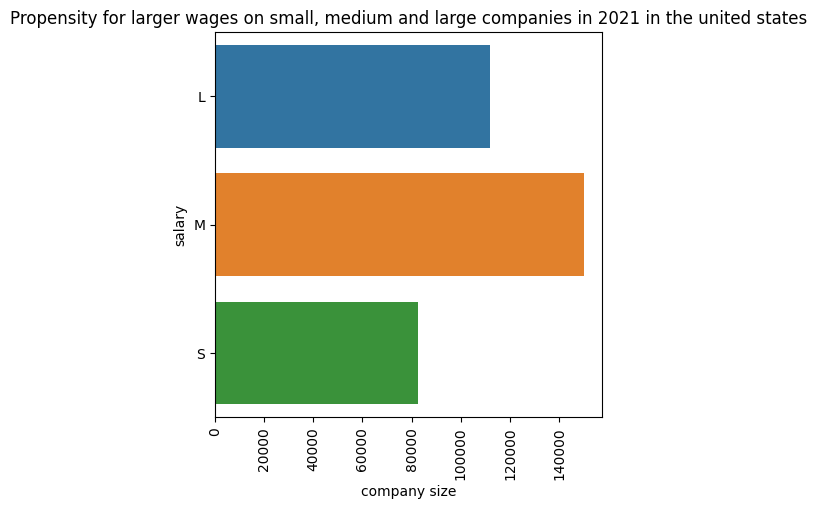

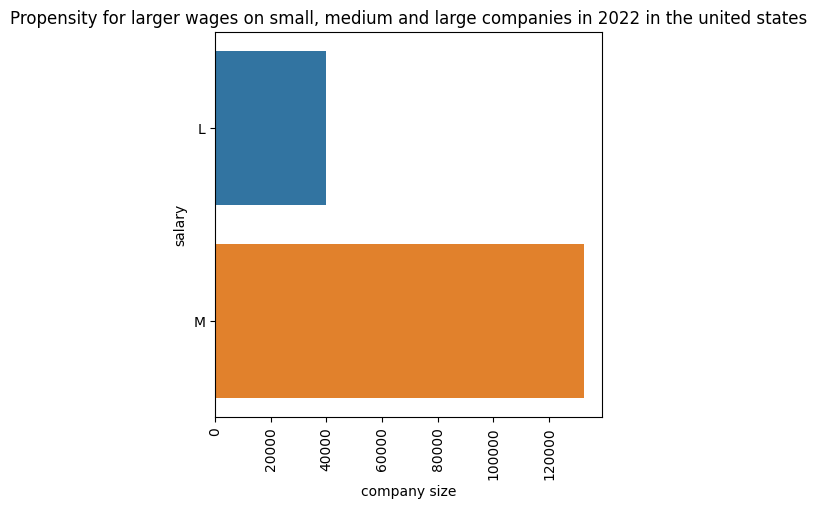

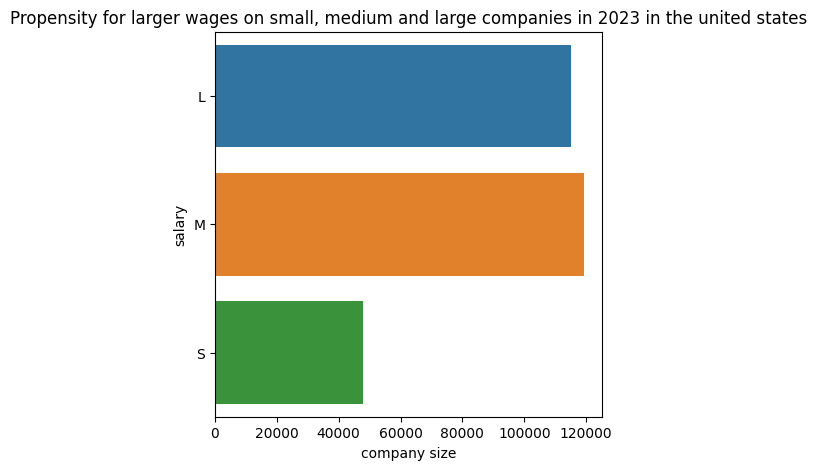

In [30]:
company = df.drop(['remote_ratio','employee_residence','salary_in_usd','employment_type'], axis=1)
company = company.groupby(['salary_currency']).get_group('USD')
company = company.groupby(['job_title']).get_group('Data Scientist')
company = company.groupby(['experience_level']).get_group('MI')
company3 = company.groupby(['work_year']).get_group(2021)
company1 = company.groupby(['work_year']).get_group(2022)
company2 = company.groupby(['work_year']).get_group(2023)
company3 = company3.groupby(['company_size'])['salary'].mean()
company2 = company2.groupby(['company_size'])['salary'].mean()
company1 = company1.groupby(['company_size'])['salary'].mean()
company3 = company3.to_frame()
company2 = company2.to_frame()
company1 = company1.to_frame()


fig, ax = plt.subplots(figsize=(5, 5))
plt.xticks(rotation=90)
ax = sns.barplot(x=company3['salary'], y=company3.index, ax=ax)
ax.set(xlabel='company size', ylabel='salary', title='Propensity for larger wages on small, medium and large companies in 2021 in the united states',)
plt.show()

fig, ax = plt.subplots(figsize=(5, 5))
ax = sns.barplot(x=company2['salary'], y=company2.index, ax=ax)
ax.set(xlabel='company size', ylabel='salary', title='Propensity for larger wages on small, medium and large companies in 2022 in the united states',)
plt.xticks(rotation=90)
plt.show()

fig, ax = plt.subplots(figsize=(5, 5))
ax = sns.barplot(x=company1['salary'], y=company1.index, ax=ax)
ax.set(xlabel='company size', ylabel='salary', title='Propensity for larger wages on small, medium and large companies in 2023 in the united states',)
plt.show()